In [3]:
import geopandas as gpd
import pandas as pd
import os
import parcelfunks
import numpy as np
from scipy import stats
import shutil
from glob import glob

In [88]:
mhomesPath = r'C:\Users\phwh9568\Data\ParcelAtlas\CO_2022\Counties\08001\08001_mhps_OG.gpkg'

In [6]:
parcelsPath = r'C:\Users\phwh9568\Data\ParcelAtlas\CO_2022\Counties\08001\parcels.shp'

In [90]:
mhomes = gpd.read_file(mhomesPath, layer='08001_mhps_OG_prepped').to_crs(crs='ESRI:102003')

In [61]:
mhomes.to_file(mhomesPath, layer='mhomes_OG_albers')

In [97]:
parcel = gpd.read_file(parcelsPath).to_crs(crs='ESRI:102003')

c:\Users\phwh9568\AppData\Local\Continuum\anaconda3\envs\geo_env\Lib\site-packages\pyogrio\raw.py:194: RuntimeWarning: C:\Users\phwh9568\Data\ParcelAtlas\CO_2022\Counties\08001\parcels.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  result = ogr_read(


In [63]:
mhomes.crs == parcel.crs

True

In [13]:
def geomLen(geom):
    return len(geom.exterior.xy[0])

def geomZscore(geom):
    return stats.zscore(len(geom.exterior.xy[0]))

In [98]:
parcel.drop_duplicates(subset=['geometry'], inplace=True)
parcel = parcel.explode(index_parts=False)
parcel['polyLen1'] = parcel.apply(lambda row: geomLen(row.geometry), axis=1)
parcel['geomZscore1'] = np.abs(stats.zscore(parcel['polyLen1']))
parcel['geometry'] = parcel['geometry'].simplify(1)
parcel['polyLen2'] = parcel.apply(lambda row: geomLen(row.geometry), axis=1)
parcel['geomZscore2'] = np.abs(stats.zscore(parcel['polyLen2']))
#parcel.drop(parcel[parcel.geomZscore > 3].index, inplace=True)
#parcel.reset_index(inplace=True)
columns = ['APN', 'APN2', 'polyLen1', 'geomZscore1', 'polyLen2', 'geomZscore2','geometry']
drops = [c for c in parcel.columns if c not in columns]
parcel.drop(drops, axis=1, inplace=True)        
#mobileHomes = gpd.read_file(mhpPath)
if boulder.crs != mhomes.crs:
    boulder.to_crs(mhomes.crs, inplace=True)
phomes_sjoin = gpd.sjoin(boulder,mhomes)
phomes_sjoin.drop('index_right', axis=1, inplace=True)
phomes_near = gpd.sjoin_nearest(boulder, mhomes, max_distance=5.0, distance_col='distances')
phomes_near.drop('index_right', axis=1, inplace=True)
phomes_near = phomes_near.sort_values(['MHPID','distances']).drop_duplicates(subset=['MHPID'], keep='first')



In [33]:
len(phomes_sjoin)

12

In [34]:
len(phomes_near)

26

In [99]:
phomes_near.to_file(r'C:\Users\phwh9568\Data\ParcelAtlas\CO_2022\Counties\08001\08001_OG.gpkg', layer='MH_parcels_near')

In [37]:
phomes_sjoin.to_file(r'C:\Users\phwh9568\Data\ParcelAtlas\CO_2022\Counties\08069\08069_OG.gpkg', layer='MH_parcels')

In [11]:
len(parcel)

103394

In [12]:
parcel.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [13]:
mhomes.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [14]:
mhomes_albers = mhomes.to_crs(crs='ESRI:102003')

In [20]:
mhomes_albers.crs

<Projected CRS: ESRI:102003>
Name: USA_Contiguous_Albers_Equal_Area_Conic
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: USA - CONUS - onshore
- bounds: (-124.79, 24.41, -66.91, 49.38)
Coordinate Operation:
- name: USA_Contiguous_Albers_Equal_Area_Conic
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [2]:
parcelsPath = r'C:\Users\phwh9568\Data\ParcelAtlas\CO_2022\Counties\08001\parcels.shp'

In [3]:
parcels = gpd.read_file(parcelsPath)

c:\Users\phwh9568\AppData\Local\Continuum\anaconda3\envs\geo_env\Lib\site-packages\pyogrio\raw.py:194: RuntimeWarning: C:\Users\phwh9568\Data\ParcelAtlas\CO_2022\Counties\08001\parcels.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  result = ogr_read(


In [4]:
parcels.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [5]:
parcels = parcels.to_crs(crs = 'ESRI:102003')

In [7]:
blocks = gpd.read_file(os.path.join(r'C:\Users\phwh9568\Data\ParcelAtlas\CO_2022\Counties\08001','08001_blocks.gpkg'), layer='08001_blocks')

In [9]:
blocks.crs

<Projected CRS: ESRI:102003>
Name: USA_Contiguous_Albers_Equal_Area_Conic
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [15]:
CO_path = r'C:\Users\phwh9568\Data\ParcelAtlas\CO_2022\Counties'
#CO_pInventory = pInventory.loc[pInventory['STATE']=='08']
CO_pInventory = pd.read_csv(r'C:\Users\phwh9568\Data\ParcelAtlas\CO_2022\counties\ColoradoInventory.csv', dtype={'STATE':str,'COUNTY':str})
CO_pInventory_True = CO_pInventory.loc[CO_pInventory['DATA_PRESENT']==True]
CO_pInventory_False = CO_pInventory.loc[CO_pInventory['DATA_PRESENT']==False]
CO_pInventory_False.to_csv(os.path.join(CO_path,'missingParcelData.csv')) # need to get this to work
fipsList = CO_pInventory_True['COUNTY'].tolist()   
parcelsPaths = [os.path.join(CO_path,fips) for fips in fipsList]

In [52]:
co_22_dir = r'C:\Users\phwh9568\Data\ParcelAtlas\CO_2022'
unionDF = pd.DataFrame()
joinDF = pd.DataFrame()
for path in parcelsPaths:
    fips = path.split('\\')[-1]
    if os.path.exists(os.path.join(path,fips+'multi15.gpkg')):
        union = gpd.read_file(os.path.join(path, fips+'multi15.gpkg'),layer='MH_parc_blk_union')
        unionDF = pd.concat([unionDF,union])
        join = gpd.read_file(os.path.join(path, fips+'multi15.gpkg'),layer='MH_parcels')
        joinDF = pd.concat([joinDF,join])        
unionDF.to_file(os.path.join(co_22_dir,'Colorado_Final_multi15.gpkg'),layer='Colorado_Final_union')
#joinDF['polyLen_3'] = joinDF.apply(lambda row: geomLen(row.geometry), axis=1)
#joinDF['geomZscore_3'] = np.abs(stats.zscore(joinDF['polyLen2']))
joinDF.to_file(os.path.join(co_22_dir, 'Colorado_Final_multi15.gpkg'),layer='Colorado_Final_MH_parcels')

In [17]:
final_near_join = gpd.read_file(os.path.join(co_22_dir, 'Colorado_Final_multi15.gpkg'), layer='Colorado_Final_MH_parcels')
final_near_join.to_csv(os.path.join(co_22_dir, 'Colorado_Final_multi15_parcels.csv'))

Blow up old ones

In [51]:
for fips, path in zip(fipsList,parcelsPaths):
    if os.path.exists(os.path.join(path,fips+'multi15.gpkg')):
        os.remove((os.path.join(path,fips+'multi15.gpkg')))

Larimer

In [18]:
larmier = gpd.read_file(r'C:\Users\phwh9568\Data\ParcelAtlas\CO_2022\Counties\08069\parcels.shp')

c:\Users\phwh9568\AppData\Local\Continuum\anaconda3\envs\geo_env\Lib\site-packages\pyogrio\raw.py:194: RuntimeWarning: C:\Users\phwh9568\Data\ParcelAtlas\CO_2022\Counties\08069\parcels.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  result = ogr_read(


In [24]:
type(larmier['APN'][0])

str

Working on dropping non-nearest joins

In [47]:
boco = gpd.read_file(r'C:\Users\phwh9568\Data\ParcelAtlas\CO_2022\Counties\08013\08013_OG.gpkg', layer='MH_parcels_near')

In [48]:
boco.columns

Index(['APN', 'APN2', 'polyLen', 'geomZscore', 'MHPID', 'MH_NAME',
       'MH_ADDRESS', 'MH_CITY', 'MH_STATE', 'MH_ZIP', 'MH_STATUS',
       'MH_COUNTY_FIPS', 'MH_LATITUDE', 'MH_LONGITUDE', 'distances',
       'geometry'],
      dtype='object')

In [63]:
dupMHPIDs = boco.loc[boco['MHPID'].duplicated() == True]['MHPID']

In [66]:
boco.columns

Index(['APN', 'APN2', 'polyLen', 'geomZscore', 'MHPID', 'MH_NAME',
       'MH_ADDRESS', 'MH_CITY', 'MH_STATE', 'MH_ZIP', 'MH_STATUS',
       'MH_COUNTY_FIPS', 'MH_LATITUDE', 'MH_LONGITUDE', 'distances',
       'geometry'],
      dtype='object')

In [72]:
boco_group = boco.groupby(['MHPID', 'distances']).first()

this works

In [ ]:
boco.sort_values(['MHPID','distances']).drop_duplicates(subset=['MHPID'], keep='first')

Simplifying geometry

In [ ]:
parcel['geometry'] = parcel['geometry'].simplify(1)

In [106]:
colorado = gpd.read_file(r'C:\Users\phwh9568\Data\ParcelAtlas\CO_2022\Colorado_Final_near.gpkg', layer='Colorado_Final_MH_parcels')

In [107]:
len(colorado)

418

In [124]:
len(colorado['geometry'][107].exterior.xy[0] + len(colorado['geometry'][107].interiors.xy[0]))

AttributeError: 'InteriorRingSequence' object has no attribute 'xy'

In [172]:
interiors = colorado['geometry'][107].interiors

In [171]:
interiors[0]

IndexError: index out of range

In [162]:
len(interiors[0].xy[0])


5

In [134]:
total = 0
for g in interiors:
    total += len(g.xy[0])

In [135]:
total

1608

In [136]:
interiorSum = sum([len(g.xy[0]) for g in interiors])

In [137]:
interiorSum

1608

In [176]:
geom = colorado['geometry'][106]

In [177]:
def geomLen(geom):
    exterior = len(geom.exterior.xy[0])
    interior = sum([len(g.xy[0]) for g in geom.interiors]) if len(geom.interiors) > 0 else 0
    return exterior+interior

In [180]:
def geomLenOld(geom):
    exterior = len(geom.exterior.xy[0])
    #interior = sum([len(g.xy[0]) for g in geom.interiors]) if len(geom.interiors) > 0 else 0
    return exterior

In [182]:
x = geomLen(geom)
print(x)

10


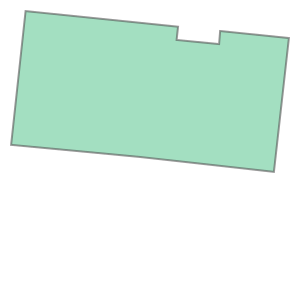

In [179]:
geom

Adding buildings

In [208]:
parcelAtlas_path = r'C:\Users\phwh9568\Data\ParcelAtlas'

In [475]:
US_county_fips = pd.read_csv(os.path.join(parcelAtlas_path, 'US_county_fips.csv'), dtype={'FIPS':str})

In [478]:
colorado_county_fips = US_county_fips.loc[US_county_fips['FIPS'].str.startswith('08')]

In [479]:
co_county_fips = dict(zip(colorado_county_fips['FIPS'].to_list(), colorado_county_fips['NAME'].to_list()))

In [480]:
len(co_county_fips)

64

In [482]:
county_dir = r'C:\Users\phwh9568\Data\ParcelAtlas\CO_2022\Counties'
buildings_dir = r'C:\Users\phwh9568\Data\Colorado_Microsoft_Footprints'

In [483]:
for f,n in co_county_fips.items():
    if os.path.exists(os.path.join(county_dir,f)):
        name = n.replace(' ','_')+'_Buildings'
        files = glob(os.path.join(buildings_dir,name,name+'*'))
        for src in files:
            dst = os.path.join(county_dir,f,f+'_'+src.split('_')[-1].lower())
            shutil.copy(src, dst)
        #src = os.path.join(buildings_dir,name,name+'.shp')
        #dst = (os.path.join(county_dir,f,f+'_buildings.shp'))
        #shutil.copy(src,dst)


blow up old ones

In [481]:
for f,n in co_county_fips.items():
    path = os.path.join(county_dir, f+'_buildings.shp')
    if os.path.exists(path):
        os.remove(path)

In [484]:
co_county_fips

{'08001': 'Adams County',
 '08003': 'Alamosa County',
 '08005': 'Arapahoe County',
 '08007': 'Archuleta County',
 '08009': 'Baca County',
 '08011': 'Bent County',
 '08013': 'Boulder County',
 '08014': 'Broomfield County',
 '08015': 'Chaffee County',
 '08017': 'Cheyenne County',
 '08019': 'Clear Creek County',
 '08021': 'Conejos County',
 '08023': 'Costilla County',
 '08025': 'Crowley County',
 '08027': 'Custer County',
 '08029': 'Delta County',
 '08031': 'Denver County',
 '08033': 'Dolores County',
 '08035': 'Douglas County',
 '08037': 'Eagle County',
 '08039': 'Elbert County',
 '08041': 'El Paso County',
 '08043': 'Fremont County',
 '08045': 'Garfield County',
 '08047': 'Gilpin County',
 '08049': 'Grand County',
 '08051': 'Gunnison County',
 '08053': 'Hinsdale County',
 '08055': 'Huerfano County',
 '08057': 'Jackson County',
 '08059': 'Jefferson County',
 '08061': 'Kiowa County',
 '08063': 'Kit Carson County',
 '08065': 'Lake County',
 '08067': 'La Plata County',
 '08069': 'Larimer Co

Sum of Buildings within parcels

In [468]:
adams = gpd.read_file(os.path.join(county_dir,'08001', 'parcels.shp')).to_crs('ESRI:102003')

c:\Users\phwh9568\AppData\Local\Continuum\anaconda3\envs\geo_env\Lib\site-packages\pyogrio\raw.py:194: RuntimeWarning: C:\Users\phwh9568\Data\ParcelAtlas\CO_2022\Counties\08001\parcels.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  result = ogr_read(


In [469]:
adams['ID'] = adams.index
cols = adams.columns.to_list()
cols = [cols[-1]] + cols[:-1] 

In [472]:
adams = adams[cols]

In [473]:
adams.columns

Index(['ID', 'APN', 'APN2', 'STATE', 'COUNTY', 'FIPS', 'SIT_HSE_NU', 'SIT_DIR',
       'SIT_STR_NA', 'SIT_STR_SF', 'SIT_FULL_S', 'SIT_CITY', 'SIT_STATE',
       'SIT_ZIP', 'SIT_ZIP4', 'LAND_VALUE', 'IMPR_VALUE', 'TOT_VALUE',
       'ASSMT_YEAR', 'REC_DATE', 'SALES_PRIC', 'YEAR_BUILT', 'STD_LAND_U',
       'LOT_SIZE', 'BLDG_AREA', 'DEED_DSCR', 'NO_OF_STOR', 'NO_OF_UNIT',
       'BEDROOMS', 'BATHROOMS', 'OWNER', 'OWNER2', 'OWNADDRESS', 'OWNADDRES2',
       'OWNCTYSTZP', 'XCOORD', 'YCOORD', 'MINX', 'MINY', 'MAXX', 'MAXY',
       'VERSION', 'QUANTARIUM', 'ATTDATE', 'geomCalc', 'geometry'],
      dtype='object')

In [443]:
adamsBuildings = gpd.read_file(os.path.join(county_dir,'08001','08001_buildings.shp')).to_crs('ESRI:102003')

In [444]:
dfsjoin = gpd.sjoin(adams, adamsBuildings, predicate='contains') #Spatial join Points to polygons

In [445]:
dfpivot = pd.pivot_table(dfsjoin,index=['ID','APN'], aggfunc={'FID':len}).reset_index()

In [447]:
dfpolynew = adams.merge(dfpivot, how='left', on='ID')

In [455]:
dfpolynew.rename({'APN_x':'APN', 'FID': 'Build_Count'}, axis='columns',inplace=True)

In [457]:
dfpolynew['Build_Count'].fillna(0, inplace=True)

In [459]:
dfpolynew.drop(['ID','APN_y'], axis=1, inplace=True)

In [464]:
def sumWithin(df1,df2):
    dfsjoin = gpd.sjoin(df1,df2,predicate='contains')
    dfpivot = pd.pivot_table(dfsjoin,index=['ID','APN'], aggfunc={'FID':len}).reset_index()
    dfpolynew = df1.merge(dfpivot, how='left', on='ID')
    dfpolynew.rename({'APN_x':'APN', 'FID': 'Sum_Within'}, axis='columns',inplace=True)
    dfpolynew['Sum_Within'].fillna(0, inplace=True)
    dfpolynew.drop(['ID','APN_y'], axis=1, inplace=True)
    return dfpolynew


In [461]:
len(adams)

118838

In [465]:
testdf = sumWithin(adams,adamsBuildings)

In [467]:
testdf

,APN,APN2,STATE,COUNTY,FIPS,SIT_HSE_NU,SIT_DIR,SIT_STR_NA,SIT_STR_SF,SIT_FULL_S,...,MINX,MINY,MAXX,MAXY,VERSION,QUANTARIUM,ATTDATE,geomCalc,geometry,Sum_Within
0,155700000045,1,CO,Adams,08001,None,None,None,None,None,...,-104.066892,39.978658,-104.057487,39.985909,12/20/2016,None,20211030,630151.6230,"POLYGON ((-681231.654 306696.813, -681999.276 ...",0.0
1,155700000007,2,CO,Adams,08001,None,None,None,None,None,...,-104.067448,39.996597,-104.057978,40.001045,12/20/2016,None,20211030,384020.4328,"POLYGON ((-681449.948 309232.732, -681450.962 ...",0.0
2,155700000150,3,CO,Adams,08001,None,None,None,None,None,...,-104.057782,39.993095,-104.038983,39.997066,12/20/2016,None,20211030,669224.3293,"POLYGON ((-679532.942 308190.972, -680326.252 ...",0.0
3,155700000149,4,CO,Adams,08001,None,None,None,None,None,...,-104.053055,39.996835,-104.039052,40.000994,12/20/2016,None,20211030,532267.7586,"POLYGON ((-680646.427 309153.695, -680646.245 ...",0.0
4,155700000006,5,CO,Adams,08001,16704,None,MIMOSA MILE,RD,16704 MIMOSA MILE RD,...,-104.057856,39.996766,-104.052995,40.000949,12/20/2016,22098024,20211030,187514.4901,"POLYGON ((-680680.353 308693.941, -681061.940 ...",2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118833,181333111009,166570,CO,Adams,08001,None,None,None,None,166570 2315 TROUT RD,...,-104.330532,39.749104,-104.330119,39.749356,12/20/2016,None,20211030,977.4080,"POLYGON ((-706475.383 283060.727, -706510.315 ...",0.0
118834,182504302022,166571,CO,Adams,08001,None,None,None,None,166571 2125 W 64TH AVE,...,-105.012647,39.812962,-105.010913,39.813580,12/20/2016,None,20211030,5394.8983,"POLYGON ((-763401.996 295518.311, -763365.602 ...",0.0
118835,182504302021,166572,CO,Adams,08001,None,None,None,None,166572 2075 W 64TH AVE,...,-105.014805,39.812963,-105.011479,39.815228,12/20/2016,22244250,20211030,40742.1354,"POLYGON ((-763622.608 295727.276, -763483.233 ...",0.0
118836,182504302020,166573,CO,Adams,08001,None,None,None,None,166573 2175 W 64TH AVE,...,-105.012533,39.813529,-105.009931,39.815120,12/20/2016,None,20211030,21055.6189,"POLYGON ((-763366.706 295686.630, -763315.925 ...",0.0


In [8]:
adams = gpd.read_file(parcelsPath)

c:\Users\phwh9568\AppData\Local\Continuum\anaconda3\envs\geo_env\Lib\site-packages\pyogrio\raw.py:194: RuntimeWarning: C:\Users\phwh9568\Data\ParcelAtlas\CO_2022\Counties\08001\parcels.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  result = ogr_read(


In [9]:
adams.columns

Index(['APN', 'APN2', 'STATE', 'COUNTY', 'FIPS', 'SIT_HSE_NU', 'SIT_DIR',
       'SIT_STR_NA', 'SIT_STR_SF', 'SIT_FULL_S', 'SIT_CITY', 'SIT_STATE',
       'SIT_ZIP', 'SIT_ZIP4', 'LAND_VALUE', 'IMPR_VALUE', 'TOT_VALUE',
       'ASSMT_YEAR', 'REC_DATE', 'SALES_PRIC', 'YEAR_BUILT', 'STD_LAND_U',
       'LOT_SIZE', 'BLDG_AREA', 'DEED_DSCR', 'NO_OF_STOR', 'NO_OF_UNIT',
       'BEDROOMS', 'BATHROOMS', 'OWNER', 'OWNER2', 'OWNADDRESS', 'OWNADDRES2',
       'OWNCTYSTZP', 'XCOORD', 'YCOORD', 'MINX', 'MINY', 'MAXX', 'MAXY',
       'VERSION', 'QUANTARIUM', 'ATTDATE', 'geomCalc', 'geometry'],
      dtype='object')

In [10]:
adams['LOT_SIZE'] == True

0         False
1         False
2         False
3         False
4         False
          ...  
118833    False
118834    False
118835    False
118836    False
118837    False
Name: LOT_SIZE, Length: 118838, dtype: bool

In [27]:
import winsound
duration = 1000  # milliseconds
freq = 450  # Hz
winsound.Beep(freq, duration)

,APN,APN2,STATE,COUNTY,FIPS,SIT_HSE_NU,SIT_DIR,SIT_STR_NA,SIT_STR_SF,SIT_FULL_S,...,YCOORD,MINX,MINY,MAXX,MAXY,VERSION,QUANTARIUM,ATTDATE,geomCalc,geometry
0,155700000045,1,CO,Adams,08001,None,None,None,None,None,...,39.9823,-104.066892,39.978658,-104.057487,39.985909,12/20/2016,None,20211030,630151.6230,"POLYGON ((-104.05749 39.97866, -104.06659 39.9..."
1,155700000007,2,CO,Adams,08001,None,None,None,None,None,...,39.9988,-104.067448,39.996597,-104.057978,40.001045,12/20/2016,None,20211030,384020.4328,"POLYGON ((-104.06260 40.00104, -104.06260 40.0..."
2,155700000150,3,CO,Adams,08001,None,None,None,None,None,...,39.9950,-104.057782,39.993095,-104.038983,39.997066,12/20/2016,None,20211030,669224.3293,"POLYGON ((-104.03898 39.99323, -104.04838 39.9..."
3,155700000149,4,CO,Adams,08001,None,None,None,None,None,...,39.9990,-104.053055,39.996835,-104.039052,40.000994,12/20/2016,None,20211030,532267.7586,"POLYGON ((-104.05306 40.00095, -104.05306 40.0..."
4,155700000006,5,CO,Adams,08001,16704,None,MIMOSA MILE,RD,16704 MIMOSA MILE RD,...,39.9989,-104.057856,39.996766,-104.052995,40.000949,12/20/2016,22098024,20211030,187514.4901,"POLYGON ((-104.05299 39.99683, -104.05751 39.9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118833,181333111009,166570,CO,Adams,08001,None,None,None,None,166570 2315 TROUT RD,...,39.7492,-104.330532,39.749104,-104.330119,39.749356,12/20/2016,None,20211030,977.4080,"POLYGON ((-104.33012 39.74911, -104.33053 39.7..."
118834,182504302022,166571,CO,Adams,08001,None,None,None,None,166571 2125 W 64TH AVE,...,39.8132,-105.012647,39.812962,-105.010913,39.813580,12/20/2016,None,20211030,5394.8983,"POLYGON ((-105.01137 39.81353, -105.01091 39.8..."
118835,182504302021,166572,CO,Adams,08001,None,None,None,None,166572 2075 W 64TH AVE,...,39.8142,-105.014805,39.812963,-105.011479,39.815228,12/20/2016,22244250,20211030,40742.1354,"POLYGON ((-105.01419 39.81520, -105.01253 39.8..."
118836,182504302020,166573,CO,Adams,08001,None,None,None,None,166573 2175 W 64TH AVE,...,39.8145,-105.012533,39.813529,-105.009931,39.815120,12/20/2016,None,20211030,21055.6189,"POLYGON ((-105.01114 39.81505, -105.01054 39.8..."


In [44]:
del testdf

In [50]:
mesa = os.path.join(co_22_dir,'counties','08077','parcels.shp')
mesaBlgs = os.path.join(co_22_dir,'counties','08077','08077_buildings.shp')

In [49]:
parcelfunks.parcelMHPJoin(mesa)

c:\Users\phwh9568\AppData\Local\Continuum\anaconda3\envs\geo_env\Lib\site-packages\pyogrio\raw.py:194: RuntimeWarning: C:\Users\phwh9568\Data\ParcelAtlas\CO_2022\counties\08077\parcels.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  result = ogr_read(


In [61]:
mesaParcels = gpd.read_file(mesa).to_crs('ESRI:102003')
mesaBuildings = gpd.read_file(mesaBlgs).to_crs('ESRI:102003')

c:\Users\phwh9568\AppData\Local\Continuum\anaconda3\envs\geo_env\Lib\site-packages\pyogrio\raw.py:194: RuntimeWarning: C:\Users\phwh9568\Data\ParcelAtlas\CO_2022\counties\08077\parcels.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  result = ogr_read(


In [62]:
mesaParcels.drop_duplicates(subset=['geometry'], inplace=True)
mesaParcels = mesaParcels.explode(index_parts=False)

In [63]:
mesaJoins = gpd.sjoin(mesaParcels,mesaBuildings,predicate='contains')

In [58]:
mesaJoins.columns

Index(['APN', 'APN2', 'STATE', 'COUNTY', 'FIPS', 'SIT_HSE_NU', 'SIT_DIR',
       'SIT_STR_NA', 'SIT_STR_SF', 'SIT_FULL_S', 'SIT_CITY', 'SIT_STATE',
       'SIT_ZIP', 'SIT_ZIP4', 'LAND_VALUE', 'IMPR_VALUE', 'TOT_VALUE',
       'ASSMT_YEAR', 'REC_DATE', 'SALES_PRIC', 'YEAR_BUILT', 'STD_LAND_U',
       'LOT_SIZE', 'BLDG_AREA', 'DEED_DSCR', 'NO_OF_STOR', 'NO_OF_UNIT',
       'BEDROOMS', 'BATHROOMS', 'OWNER', 'OWNER2', 'OWNADDRESS', 'OWNADDRES2',
       'OWNCTYSTZP', 'XCOORD', 'YCOORD', 'MINX', 'MINY', 'MAXX', 'MAXY',
       'MKT_VALUE', 'ATTDATE', 'VERSION', 'QUANTARIUM', 'geometry',
       'index_right', 'FID', 'County'],
      dtype='object')

In [64]:
mesaJoins.loc[mesaJoins['APN'] == '294312200193']

,APN,APN2,STATE,COUNTY,FIPS,SIT_HSE_NU,SIT_DIR,SIT_STR_NA,SIT_STR_SF,SIT_FULL_S,...,MAXX,MAXY,MKT_VALUE,ATTDATE,VERSION,QUANTARIUM,geometry,index_right,FID,County
40069,294312200193,None,CO,Mesa,08077,3349,None,F,RD,3349 F RD,...,-108.431632,39.09154,281510.0,20211030,3-6-2022,24122474,"POLYGON ((-1062417.456 247890.899, -1062407.06...",42984,1261601,Mesa County


trouble shooting multipart problem

In [91]:
import importlib

In [117]:
importlib.reload(parcelfunks)

<module 'parcelfunks' from 'c:\\Users\\phwh9568\\Data\\ParcelAtlas\\CO_2022\\parcelfunks.py'>

In [118]:
ouray = gpd.read_file(os.path.join(co_22_dir,'counties','08091','parcels.shp')).to_crs(crs='ESRI:102003')

c:\Users\phwh9568\AppData\Local\Continuum\anaconda3\envs\geo_env\Lib\site-packages\pyogrio\raw.py:194: RuntimeWarning: C:\Users\phwh9568\Data\ParcelAtlas\CO_2022\counties\08091\parcels.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  result = ogr_read(


In [119]:
ouray.drop_duplicates(subset=['geometry'], inplace=True)

In [120]:
ouray.columns

Index(['APN', 'APN2', 'STATE', 'COUNTY', 'FIPS', 'SIT_HSE_NU', 'SIT_DIR',
       'SIT_STR_NA', 'SIT_STR_SF', 'SIT_FULL_S', 'SIT_CITY', 'SIT_STATE',
       'SIT_ZIP', 'SIT_ZIP4', 'LAND_VALUE', 'IMPR_VALUE', 'TOT_VALUE',
       'ASSMT_YEAR', 'REC_DATE', 'SALES_PRIC', 'YEAR_BUILT', 'STD_LAND_U',
       'LOT_SIZE', 'BLDG_AREA', 'DEED_DSCR', 'NO_OF_STOR', 'NO_OF_UNIT',
       'BEDROOMS', 'BATHROOMS', 'OWNER', 'OWNER2', 'OWNADDRESS', 'OWNADDRES2',
       'OWNCTYSTZP', 'XCOORD', 'YCOORD', 'MINX', 'MINY', 'MAXX', 'MAXY',
       'VERSION', 'QUANTARIUM', 'ATTDATE', 'geometry'],
      dtype='object')

In [129]:
ourayExploded = ouray.explode(index_parts=False)

In [130]:
ourayExploded.columns

Index(['APN', 'APN2', 'STATE', 'COUNTY', 'FIPS', 'SIT_HSE_NU', 'SIT_DIR',
       'SIT_STR_NA', 'SIT_STR_SF', 'SIT_FULL_S', 'SIT_CITY', 'SIT_STATE',
       'SIT_ZIP', 'SIT_ZIP4', 'LAND_VALUE', 'IMPR_VALUE', 'TOT_VALUE',
       'ASSMT_YEAR', 'REC_DATE', 'SALES_PRIC', 'YEAR_BUILT', 'STD_LAND_U',
       'LOT_SIZE', 'BLDG_AREA', 'DEED_DSCR', 'NO_OF_STOR', 'NO_OF_UNIT',
       'BEDROOMS', 'BATHROOMS', 'OWNER', 'OWNER2', 'OWNADDRESS', 'OWNADDRES2',
       'OWNCTYSTZP', 'XCOORD', 'YCOORD', 'MINX', 'MINY', 'MAXX', 'MAXY',
       'VERSION', 'QUANTARIUM', 'ATTDATE', 'geometry'],
      dtype='object')

In [131]:
ourayExploded.reset_index(inplace=True)

In [132]:
ourayExploded.columns

Index(['index', 'APN', 'APN2', 'STATE', 'COUNTY', 'FIPS', 'SIT_HSE_NU',
       'SIT_DIR', 'SIT_STR_NA', 'SIT_STR_SF', 'SIT_FULL_S', 'SIT_CITY',
       'SIT_STATE', 'SIT_ZIP', 'SIT_ZIP4', 'LAND_VALUE', 'IMPR_VALUE',
       'TOT_VALUE', 'ASSMT_YEAR', 'REC_DATE', 'SALES_PRIC', 'YEAR_BUILT',
       'STD_LAND_U', 'LOT_SIZE', 'BLDG_AREA', 'DEED_DSCR', 'NO_OF_STOR',
       'NO_OF_UNIT', 'BEDROOMS', 'BATHROOMS', 'OWNER', 'OWNER2', 'OWNADDRESS',
       'OWNADDRES2', 'OWNCTYSTZP', 'XCOORD', 'YCOORD', 'MINX', 'MINY', 'MAXX',
       'MAXY', 'VERSION', 'QUANTARIUM', 'ATTDATE', 'geometry'],
      dtype='object')

In [133]:
ourayExploded.drop(['index'], axis=1,inplace=True)

In [134]:
ourayExploded.columns

Index(['APN', 'APN2', 'STATE', 'COUNTY', 'FIPS', 'SIT_HSE_NU', 'SIT_DIR',
       'SIT_STR_NA', 'SIT_STR_SF', 'SIT_FULL_S', 'SIT_CITY', 'SIT_STATE',
       'SIT_ZIP', 'SIT_ZIP4', 'LAND_VALUE', 'IMPR_VALUE', 'TOT_VALUE',
       'ASSMT_YEAR', 'REC_DATE', 'SALES_PRIC', 'YEAR_BUILT', 'STD_LAND_U',
       'LOT_SIZE', 'BLDG_AREA', 'DEED_DSCR', 'NO_OF_STOR', 'NO_OF_UNIT',
       'BEDROOMS', 'BATHROOMS', 'OWNER', 'OWNER2', 'OWNADDRESS', 'OWNADDRES2',
       'OWNCTYSTZP', 'XCOORD', 'YCOORD', 'MINX', 'MINY', 'MAXX', 'MAXY',
       'VERSION', 'QUANTARIUM', 'ATTDATE', 'geometry'],
      dtype='object')

In [135]:
ourayExploded.loc[ourayExploded['APN']=='R000553']

,APN,APN2,STATE,COUNTY,FIPS,SIT_HSE_NU,SIT_DIR,SIT_STR_NA,SIT_STR_SF,SIT_FULL_S,...,XCOORD,YCOORD,MINX,MINY,MAXX,MAXY,VERSION,QUANTARIUM,ATTDATE,geometry
3721,R000553,451531224032,CO,Ouray,08091,790,None,OAK,ST,790 OAK ST,...,-107.674,38.0264,-107.674719,38.024392,-107.673263,38.028229,1/7/2012,24251599,20211030,"POLYGON ((-1012547.261 121198.504, -1012572.08..."
3722,R000553,451531224032,CO,Ouray,08091,790,None,OAK,ST,790 OAK ST,...,-107.674,38.0264,-107.674719,38.024392,-107.673263,38.028229,1/7/2012,24251599,20211030,"POLYGON ((-1012539.452 121063.945, -1012549.63..."


In [110]:
problem =ourayExploded.loc[ourayExploded['APN']=='R000553']

In [111]:
problem

,index,APN,APN2,STATE,COUNTY,FIPS,SIT_HSE_NU,SIT_DIR,SIT_STR_NA,SIT_STR_SF,...,XCOORD,YCOORD,MINX,MINY,MAXX,MAXY,VERSION,QUANTARIUM,ATTDATE,geometry
3721,4452,R000553,451531224032,CO,Ouray,08091,790,None,OAK,ST,...,-107.674,38.0264,-107.674719,38.024392,-107.673263,38.028229,1/7/2012,24251599,20211030,"POLYGON ((-1012547.261 121198.504, -1012572.08..."
3722,4452,R000553,451531224032,CO,Ouray,08091,790,None,OAK,ST,...,-107.674,38.0264,-107.674719,38.024392,-107.673263,38.028229,1/7/2012,24251599,20211030,"POLYGON ((-1012539.452 121063.945, -1012549.63..."


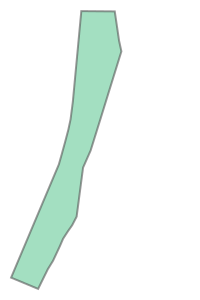

In [83]:
problem.iloc[1].geometry

In [84]:
ourayBuildings = gpd.read_file(os.path.join(co_22_dir, 'counties', '08091', '08091_buildings.shp')).to_crs(crs='ESRI:102003')

In [112]:
within = parcelfunks.sumWithin('08091', ourayExploded,ourayBuildings)

In [113]:
probWithin = within.loc[within['APN']=='R000553']

In [114]:
probWithin

,ID,index,APN,APN2,STATE,COUNTY,FIPS,SIT_HSE_NU,SIT_DIR,SIT_STR_NA,...,YCOORD,MINX,MINY,MAXX,MAXY,VERSION,QUANTARIUM,ATTDATE,geometry,Sum_Within
3721,3721,4452,R000553,451531224032,CO,Ouray,08091,790,None,OAK,...,38.0264,-107.674719,38.024392,-107.673263,38.028229,1/7/2012,24251599,20211030,"POLYGON ((-1012547.261 121198.504, -1012572.08...",0.0
3722,3722,4452,R000553,451531224032,CO,Ouray,08091,790,None,OAK,...,38.0264,-107.674719,38.024392,-107.673263,38.028229,1/7/2012,24251599,20211030,"POLYGON ((-1012539.452 121063.945, -1012549.63...",16.0


What if I leave multiparts?

In [141]:
withinMulti = parcelfunks.sumWithin('08091', ouray,ourayBuildings)

In [144]:
probWithinMulti = probWithin = withinMulti.loc[withinMulti['APN']=='R000553']

In [188]:
probWithinMulti['geometry']

3533    MULTIPOLYGON (((-1012547.261 121198.504, -1012...
Name: geometry, dtype: geometry

In [146]:
withinMulti['geometry'] = withinMulti['geometry'].simplify(1)

In [149]:
withinMulti['intLen'] = withinMulti.apply(lambda row: parcelfunks.interiorLen(row.geometry), axis=1)

AttributeError: 'MultiPolygon' object has no attribute 'interiors'

In [164]:
withinMulti['geometry'].xy

AttributeError: 'GeoSeries' object has no attribute 'xy'

In [250]:
first = withinMulti.iloc[0]

In [223]:
len(first['geometry'].geoms[0].exterior.xy[0])

5

In [251]:
geometry = first['geometry']

In [252]:
if geometry.geom_type == 'MultiPolygon':
    print(sum([len(g.exterior.xy[0]) for g in geometry.geoms]))
if geometry.geom_type == 'Polygon':
    print(len(g.exterior.xy[0]))

10


In [189]:
probWithinMulti

,APN,APN2,STATE,COUNTY,FIPS,SIT_HSE_NU,SIT_DIR,SIT_STR_NA,SIT_STR_SF,SIT_FULL_S,...,YCOORD,MINX,MINY,MAXX,MAXY,VERSION,QUANTARIUM,ATTDATE,geometry,Sum_Within
3533,R000553,451531224032,CO,Ouray,08091,790,None,OAK,ST,790 OAK ST,...,38.0264,-107.674719,38.024392,-107.673263,38.028229,1/7/2012,24251599,20211030,"MULTIPOLYGON (((-1012547.261 121198.504, -1012...",16.0


In [254]:
adamsMultis = adams.loc[adams['geometry'].geom_type=='MultiPolygon']

In [262]:
adamsMultis['geometry'].interiors.unique()

array([None], dtype=object)

In [263]:
boulder = gpd.read_file(os.path.join(co_22_dir,'counties','08013','parcels.shp'))
jeffco = gpd.read_file(os.path.join(co_22_dir,'counties','08059','parcels.shp'))

c:\Users\phwh9568\AppData\Local\Continuum\anaconda3\envs\geo_env\Lib\site-packages\pyogrio\raw.py:194: RuntimeWarning: C:\Users\phwh9568\Data\ParcelAtlas\CO_2022\counties\08013\parcels.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  result = ogr_read(
c:\Users\phwh9568\AppData\Local\Continuum\anaconda3\envs\geo_env\Lib\site-packages\pyogrio\raw.py:194: RuntimeWarning: C:\Users\phwh9568\Data\ParcelAtlas\CO_2022\counties\08059\parcels.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  result = ogr_read(


In [264]:
boulderMultis = boulder.loc[boulder['geometry'].geom_type=='MultiPolygon']
jeffcoMultis  = jeffco.loc[jeffco['geometry'].geom_type=='MultiPolygon']

In [369]:
boulderMultis.reset_index(inplace=True)

In [363]:
len(boulderMultis)

4760

In [370]:
count = 0
for i,row in boulderMultis.iterrows():
    if len(row['geometry'].geoms[0].interiors) > 0:
           print(i, row['APN'])
    #print(i.geoms[0].interiors)


87 120100000023
116 120131000026
171 120526418001
172 120526418001
173 120526418001
174 120526418001
175 120526418001
176 120526418001
177 120526418001
178 120526418001
179 120526418001
180 120526418001
181 120526418001
182 120526418001
235 131501172009
241 131501211034
295 131507464001
296 131507464001
297 131507464001
298 131507464001
299 131507464001
300 131507464001
301 131507464001
302 131507464001
309 131507463001
310 131507463001
311 131507463001
312 131507463001
313 131507463001
327 131507462001
328 131507462001
329 131507462001
330 131507462001
331 131507462001
332 131507462001
333 131507462001
334 131507462001
335 131507462001
336 131507462001
384 132101000004
385 132101000004
458 145712000015
461 132113000001
557 145922000020
860 145500000005
905 131919000086
906 131919000086
907 131919000086
908 131919000086
909 131919000086
910 131919000086
1066 145700000020
1127 145913000050
1128 145913000050
1176 145907000010
1196 146108000126
1213 145921000001
1221 145908000012
1222 145

TypeError: 'GeoDataFrame' object is not an iterator

In [346]:
for i,row in boulderMultis.iterrows():
    print(i)
    #geom = row['geometry']
    #length = len(geom.geoms[0].interiors)
    #if length > 0:
    #    print(i)

TypeError: 'int' object is not subscriptable

In [372]:
boulderInt = boulderMultis.iloc[87]

In [345]:
boulderInt['geometry'].geoms[0].interiors

0

In [385]:
len(boulderInt.geometry.geoms[0].interiors[0].xy[0])

5

In [421]:
geom = boulderInt.geometry
multiGeoms = geom.geoms

In [398]:
for geom in geoms:
    if len(geom.interiors) > 0:
        print(len(geom.interiors[0].xy[0]))

5


In [403]:
for geom in geoms:
    print(len(geom.interiors[0].xy[0])) if len(geom.interiors) > 0 else print(0)

5
0


In [423]:

#WORKS
sum([sum([len(g.xy[0]) for g in mg.interiors]) if len(mg.interiors) else 0 for mg in multiGeoms])

5

In [425]:
importlib.reload(parcelfunks)

<module 'parcelfunks' from 'c:\\Users\\phwh9568\\Data\\ParcelAtlas\\CO_2022\\parcelfunks.py'>

In [428]:
print(parcelfunks.interiorLen(geom))

5


Now, testing join workflow accounting for multipolygons (no explode)

In [431]:
boulder = gpd.read_file(os.path.join(co_22_dir,'counties','08013','parcels.shp')).to_crs(crs='ESRI:102003')


c:\Users\phwh9568\AppData\Local\Continuum\anaconda3\envs\geo_env\Lib\site-packages\pyogrio\raw.py:194: RuntimeWarning: C:\Users\phwh9568\Data\ParcelAtlas\CO_2022\counties\08013\parcels.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  result = ogr_read(


In [432]:
boulderBldgs = gpd.read_file(os.path.join(co_22_dir,'counties','08013','08013_buildings.shp')).to_crs(crs='ESRI:102003')


In [447]:
#without explode
boulder2 = gpd.read_file(os.path.join(co_22_dir,'counties','08013','parcels.shp')).to_crs(crs='ESRI:102003')
boulder2.drop_duplicates(subset=['geometry'], inplace=True)
boulder2 = (parcelfunks.sumWithin('08013',boulder2,boulderBldgs))
boulder2['geometry'] = boulder2['geometry'].simplify(1)
boulder2['intLen'] = boulder2.apply(lambda row: parcelfunks.interiorLen(row.geometry), axis=1)
boulder2['intZscore'] = np.abs(stats.zscore(boulder2['intLen']))


c:\Users\phwh9568\AppData\Local\Continuum\anaconda3\envs\geo_env\Lib\site-packages\pyogrio\raw.py:194: RuntimeWarning: C:\Users\phwh9568\Data\ParcelAtlas\CO_2022\counties\08013\parcels.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  result = ogr_read(


In [449]:
boulder2['intLen'].sort_values(ascending=False).head(20)

110740    705
107356    590
22648     395
110944    390
102823    345
79456     310
65083     309
97095     274
93463     267
94333     233
93401     211
112928    209
80314     205
96283     196
94053     186
24054     185
42454     181
76513     178
53373     176
88815     170
Name: intLen, dtype: int64

In [445]:
# exploding way:
boulder = gpd.read_file(os.path.join(co_22_dir,'counties','08013','parcels.shp')).to_crs(crs='ESRI:102003')
boulder = (parcelfunks.sumWithin('08013',boulder,boulderBldgs))
boulder.drop_duplicates(subset=['geometry'], inplace=True)
boulder = boulder.explode(index_parts=False)
boulder.reset_index(inplace=True)
boulder.drop(['index'],axis=1,inplace=True)
boulder['geometry'] = boulder['geometry'].simplify(1)
boulder['intLen'] = boulder.apply(lambda row: parcelfunks.interiorLen(row.geometry), axis=1)
boulder['intZscore'] = np.abs(stats.zscore(boulder['intLen']))

c:\Users\phwh9568\AppData\Local\Continuum\anaconda3\envs\geo_env\Lib\site-packages\pyogrio\raw.py:194: RuntimeWarning: C:\Users\phwh9568\Data\ParcelAtlas\CO_2022\counties\08013\parcels.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  result = ogr_read(


In [450]:
boulder['intLen'].sort_values(ascending=False).head(20)

116781    705
22995     395
117000    390
112967    295
112966    295
101688    274
97393     267
98399     233
67484     225
97314     211
119035    209
82278     206
83178     205
100769    196
107973    184
44485     181
92130     170
81623     166
50268     163
107972    161
Name: intLen, dtype: int64

In [454]:
boulder.iloc[116781]

APN                                                131512029001
APN2                                                  219742789
STATE                                                        CO
COUNTY                                                  Boulder
FIPS                                                      08013
SIT_HSE_NU                                                 1601
SIT_DIR                                                    None
SIT_STR_NA                                        GREAT WESTERN
SIT_STR_SF                                                   DR
SIT_FULL_S                                1601 GREAT WESTERN DR
SIT_CITY                                               LONGMONT
SIT_STATE                                                    CO
SIT_ZIP                                                   80501
SIT_ZIP4                                                   9794
LAND_VALUE                                                  0.0
IMPR_VALUE                              

In [457]:
boulder['extLen1'] = boulder.apply(lambda row: parcelfunks.exteriorLen(row.geometry), axis=1)
boulder['extZscore1'] = np.abs(stats.zscore(boulder['extLen1']))

boulder2['extLen1'] = boulder2.apply(lambda row: parcelfunks.exteriorLen(row.geometry), axis=1)
boulder2['extZscore1'] = np.abs(stats.zscore(boulder2['extLen1']))

In [460]:
columns = ['APN', 'APN2', 'intLen','intZscore', 'extLen1','extZscore1', 'Sum_Within','geometry']
drops = [c for c in boulder.columns if c not in columns]

In [461]:
boulder.drop(drops, axis=1,inplace=True)
boulder2.drop(drops, axis=1,inplace=True)

In [476]:
mobileHomes = gpd.read_file(os.path.join(co_22_dir,'counties','08013','08013_mhps_OG.gpkg'),layer='08013_mhps_OG_prepped')

In [478]:
mobileHomes = mobileHomes.to_crs(crs='ESRI:102003')

In [479]:
phomes = gpd.sjoin_nearest(boulder,mobileHomes,max_distance=10.0, distance_col='distances')

In [480]:
phomes2 = gpd.sjoin_nearest(boulder2,mobileHomes,max_distance=10.0, distance_col='distances')

In [486]:
len(phomes)

32

In [488]:
phomes2['intZscore'].sort_values(ascending=False).head(32)

60414     0.930879
2511      0.044320
71768     0.044320
109329    0.044320
108099    0.044320
108075    0.044320
107099    0.044320
105696    0.044320
103257    0.044320
100855    0.044320
100279    0.044320
104238    0.044320
96962     0.044320
95923     0.044320
95054     0.044320
82136     0.044320
71768     0.044320
3065      0.044320
67852     0.044320
66604     0.044320
54229     0.044320
41498     0.044320
31376     0.044320
25081     0.044320
24532     0.044320
21252     0.044320
20776     0.044320
93927     0.044320
13578     0.044320
13288     0.044320
12971     0.044320
110852    0.044320
Name: intZscore, dtype: float64

Multipolygon seems to work great 
 
Now working on locating all the MHP points that were not joined

In [20]:
mhp_path = os.path.join(co_22_dir,'08_MHPS_OG.gpkg')

In [21]:
mhps = gpd.read_file(mhp_path,layer='08_MHPs_Prepped_OG')

In [22]:
MHparcel_path = os.path.join(co_22_dir,'Colorado_Final_multi.gpkg')

In [23]:
MHparcels = gpd.read_file(MHparcel_path, layer='Colorado_Final_MH_parcels')

In [28]:
mhps_merge = pd.merge(mhps,MHparcels, on = 'MHPID', how='outer')

In [35]:
mhps_nonmatched = mhps_merge.loc[mhps_merge['geometry_y']==None].copy()

In [32]:
len(mhps_nonmatched)

246

In [33]:
(len(mhps_nonmatched) + len(MHparcels)) == len(mhps)

True

In [36]:
mhps_nonmatched.drop(mhps_nonmatched.filter(regex='_y$').columns, axis=1, inplace=True)

In [37]:
mhps_nonmatched.columns

Index(['MHPID', 'MH_NAME_x', 'MH_ADDRESS_x', 'MH_CITY_x', 'MH_STATE_x',
       'MH_ZIP_x', 'MH_STATUS_x', 'MH_COUNTY_FIPS_x', 'MH_LATITUDE_x',
       'MH_LONGITUDE_x', 'geometry_x', 'APN', 'APN2', 'Sum_Within', 'intLen',
       'intZscore', 'extLen1', 'extZscore1', 'distances'],
      dtype='object')

In [38]:
renames_x = mhps_nonmatched.filter(regex='_x$').columns
renames = [x.split('_x')[0] for x in renames_x]
renames = dict(zip(renames_x,renames))

In [39]:
mhps_nonmatched.rename(renames, axis='columns',inplace=True)

In [43]:
drop_cols = mhps_nonmatched.columns[11:]

In [44]:
mhps_nonmatched.drop(drop_cols,axis=1,inplace=True)

In [46]:
mhps_nonmatched.to_file(mhp_path,layer='08_mhps_non_matched')

In [50]:
mhps_nonmatched.to_csv(os.path.join(co_22_dir,'08_mhps_non_matched.csv'))

Splitting off MH-parcels matched in multi15 from multi for comparison

In [66]:
MHparcel_path = os.path.join(co_22_dir,'Colorado_Final_multi.gpkg')
MHparcel15_path = os.path.join(co_22_dir,'Colorado_Final_multi15.gpkg')
MHparcelnear_path = os.path.join(co_22_dir,'Colorado_Final_near.gpkg')

In [67]:
MHparcels = gpd.read_file(MHparcel_path, layer='Colorado_Final_MH_parcels')
MHparcels15 = gpd.read_file(MHparcel15_path, layer='Colorado_Final_MH_parcels')
MHparcelsNear = gpd.read_file(MHparcelnear_path, layer='Colorado_Final_MH_parcels')

In [57]:
len(MHparcels15)- len(MHparcels)

36

In [58]:
geomList15 = MHparcels15['geometry'].to_list()

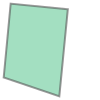

In [65]:
MHparcels15['geometry'][0]

In [61]:
MHparcels['geometry']

0      MULTIPOLYGON (((-745498.149 314093.358, -74550...
1      MULTIPOLYGON (((-751889.716 302707.761, -75213...
2      MULTIPOLYGON (((-763885.363 300576.478, -76388...
3      MULTIPOLYGON (((-745965.013 312201.144, -74608...
4      MULTIPOLYGON (((-755702.621 295754.885, -75564...
                             ...                        
433    MULTIPOLYGON (((-686680.432 407285.304, -68677...
434    MULTIPOLYGON (((-755508.853 333810.875, -75558...
435    MULTIPOLYGON (((-733580.313 355385.436, -73351...
436    MULTIPOLYGON (((-568105.421 314355.301, -56811...
437    MULTIPOLYGON (((-525503.367 303736.378, -52561...
Name: geometry, Length: 438, dtype: geometry

In [68]:
MHparcelsNear['geometry']

0      POLYGON ((-745498.149 314093.358, -745503.718 ...
1      POLYGON ((-751889.716 302707.761, -752136.951 ...
2      POLYGON ((-763885.363 300576.478, -763887.712 ...
3      POLYGON ((-745965.013 312201.144, -746083.090 ...
4      POLYGON ((-755702.621 295754.885, -755641.795 ...
                             ...                        
435    POLYGON ((-686680.432 407285.304, -686773.776 ...
436    POLYGON ((-755508.853 333810.875, -755582.704 ...
437    POLYGON ((-733580.313 355385.436, -733518.437 ...
438    POLYGON ((-568157.935 314365.799, -568165.096 ...
439    POLYGON ((-525503.367 303736.378, -525616.529 ...
Name: geometry, Length: 440, dtype: geometry

In [70]:
adams = os.path.join(co_22_dir,'counties','08001')

In [72]:
import importlib

In [77]:

importlib.reload(parcelfunks)

<module 'parcelfunks' from 'c:\\Users\\phwh9568\\Data\\ParcelAtlas\\CO_2022\\parcelfunks.py'>

In [78]:
parcelfunks.parcelMHPJoin2(adams)

c:\Users\phwh9568\AppData\Local\Continuum\anaconda3\envs\geo_env\Lib\site-packages\pyogrio\raw.py:194: RuntimeWarning: C:\Users\phwh9568\Data\ParcelAtlas\CO_2022\counties\08001\parcels.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  result = ogr_read(


0        POLYGON ((-680680.353 308693.941, -681080.927 ...
1        POLYGON ((-686073.183 305480.841, -686019.895 ...
2        POLYGON ((-682372.950 307609.340, -682757.138 ...
3        POLYGON ((-681859.141 309266.687, -681893.196 ...
4        POLYGON ((-689421.257 303347.782, -689420.847 ...
                               ...                        
64578    POLYGON ((-751190.102 287582.931, -751228.287 ...
64579    POLYGON ((-744386.017 313174.493, -744445.617 ...
64580    POLYGON ((-760332.996 306069.896, -760338.723 ...
64581    POLYGON ((-760409.400 306288.367, -760282.917 ...
64582    POLYGON ((-742495.572 308580.889, -742518.968 ...
Name: geometry, Length: 64583, dtype: geometry
622      POLYGON ((-699463.803 282272.496, -700247.660 ...
63380    POLYGON ((-698276.875 282019.896, -699456.852 ...
2219     POLYGON ((-706698.315 281877.508, -706782.598 ...
2783     POLYGON ((-714742.092 284494.598, -714738.858 ...
3041     POLYGON ((-714759.763 284496.329, -714787.121 ...
         